# Digital Innovation One
## Projeto 1 
## Bootcamp Cognizant Cloud Data Engineer
## Análise de Dados com Python 

### Dataset utilizado: Ranking Jogadores FIFA 19 

In [258]:
#IMPORTS
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
#Importando Base Principal
dfBaseGeral = pd.read_csv("dataset_all_fifa_players_2019.csv")
dfBaseGeral.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 54
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,NaN
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,NaN
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,NaN
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,NaN
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,NaN


In [162]:
#FUNÇÃO PARA AUXILIAR MODELAGEM DE DADOS

def converte_milhao(sValor):
    
    sValor = str(sValor)
    
    if sValor.find(".") == -1:
        sValor = sValor.replace('M', '000000')
    else:
        sValor = sValor.replace('M', '00000').replace(".", "")
        
    return sValor

In [168]:
#TRATANDO OS DADOS
dfBaseGeral = dfBaseGeral.drop(["Unnamed: 0", "Unnamed: 54"], axis=1)
    #SUJEIRA ENCONTRADA NO CAMPO 'VALUE' COM AUXÍLIO DA FUNÇÃO 'DataFrame.unique()'
trash = 'https://cdn.sofifa.org/teams/2/light/112429.png'
dfBaseGeral['Value'] = dfBaseGeral['Value'].where(dfBaseGeral['Value'] != trash, 0)
    #CONVERTENDO VALOR DA MOEDA PARA FLOAT64
dfBaseGeral["Value"] = dfBaseGeral["Value"].apply(lambda x: str(x).replace("€", "").replace("K", "000"))
dfBaseGeral["Value"] = dfBaseGeral["Value"].apply(lambda x: converte_milhao(x))
dfBaseGeral["Wage"] = dfBaseGeral["Wage"].apply(lambda x: str(x).replace("€", "").replace("K", "000"))
dfBaseGeral["Wage"] = dfBaseGeral["Wage"].apply(lambda x: converte_milhao(x))
dfBaseGeral["Release Clause"] = dfBaseGeral["Release Clause"].apply(lambda x: str(x).replace("€", "").replace("K", "000"))
dfBaseGeral["Release Clause"] = dfBaseGeral["Release Clause"].apply(lambda x: converte_milhao(x))
dfBaseGeral = dfBaseGeral.astype({"Value": "float64", "Wage": "float64", "Release Clause": "float64"})

dfBaseGeral.head() 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [97]:
#JOGADORES COM MAIOR POTENCIAL
dfBaseGeral.query('Potential > 91')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,None,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,None,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,None,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,None,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,None,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,None,€94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
15,211110,P. Dybala,24,Argentina,89,94,Juventus,None,€205K,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M
18,192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,None,€240K,Right,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,None,€100K,Right,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
42,205600,S. Umtiti,24,France,87,92,FC Barcelona,None,€205K,Left,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M


In [171]:
#JOGADORES COM MAIOR VALOR DE MERCADO

dfBaseGeral.sort_values(['Value'], ascending=False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,Right,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,166100000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0


In [172]:
#JOGADORES COM MAIOR SALÁRIO

dfBaseGeral.sort_values(['Wage'], ascending=False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
461,204399,E. Zahavi,30,Israel,80,80,Guangzhou R&F,0.0,14500000.0,2006,...,65.0,74.0,30.0,41.0,34.0,13.0,12.0,13.0,8.0,16.0
2262,192349,Renatinho,29,Brazil,74,74,Guangzhou R&F,0.0,5500000.0,1879,...,63.0,68.0,24.0,55.0,26.0,9.0,6.0,10.0,7.0,8.0
1758,206171,Júnior Urso,29,Brazil,75,75,Guangzhou R&F,0.0,5000000.0,1876,...,48.0,72.0,68.0,77.0,72.0,9.0,11.0,14.0,9.0,12.0
2590,176377,D. Tošić,33,Serbia,74,74,Guangzhou R&F,0.0,2300000.0,1743,...,43.0,64.0,68.0,75.0,76.0,11.0,6.0,10.0,12.0,16.0
5881,222278,Tang Miao,27,China PR,69,69,Guangzhou R&F,0.0,875000.0,1660,...,43.0,64.0,66.0,63.0,64.0,7.0,14.0,11.0,6.0,6.0
6879,201026,Yi Teng,28,China PR,68,69,Guangzhou R&F,0.0,825000.0,1449,...,41.0,56.0,65.0,68.0,66.0,6.0,13.0,14.0,10.0,16.0
7335,182451,Cheng Yuelei,30,China PR,68,68,Guangzhou R&F,0.0,575000.0,1010,...,15.0,62.0,11.0,6.0,9.0,67.0,67.0,69.0,69.0,64.0
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
13673,233394,Huang Zhengyu,21,China PR,62,75,Guangzhou R&F,0.0,525000.0,1455,...,32.0,55.0,65.0,69.0,65.0,15.0,5.0,15.0,11.0,10.0
10334,222306,Ding Haifeng,26,China PR,65,66,Guangzhou R&F,0.0,525000.0,1740,...,45.0,59.0,59.0,57.0,54.0,9.0,11.0,11.0,8.0,15.0


In [179]:
#GOLEIROS MAIS BAIXOS

dfBaseGeral.query("Position == 'GK'").sort_values(['Height']).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11721,244912,T. Sugeno,34,Japan,64,64,Hokkaido Consadole Sapporo,180000.0,1000.0,Right,...,24.0,11.0,14.0,14.0,70.0,55.0,57.0,63.0,66.0,225000.0
15040,214425,J. Quezada,27,Chile,60,63,Unión Española,170000.0,1000.0,Right,...,42.0,21.0,18.0,16.0,58.0,56.0,66.0,63.0,57.0,242000.0
13606,229534,E. Sanhueza,22,Chile,62,70,Audax Italiano,325000.0,1000.0,Right,...,35.0,20.0,25.0,22.0,62.0,61.0,59.0,62.0,61.0,504000.0
15092,241584,J. Mendive,21,Argentina,60,69,Club Atlético Huracán,240000.0,1000.0,Right,...,40.0,7.0,15.0,11.0,53.0,66.0,60.0,61.0,57.0,408000.0
13615,226721,G. Alcalá,25,Mexico,62,67,Querétaro,290000.0,1000.0,Right,...,42.0,20.0,12.0,19.0,67.0,59.0,60.0,58.0,64.0,515000.0
13823,135646,L. Walthert,34,Switzerland,62,62,Neuchâtel Xamax,120000.0,1000.0,Right,...,53.0,9.0,21.0,21.0,65.0,61.0,62.0,62.0,62.0,174000.0
7225,142998,C. Muñoz,41,Argentina,68,68,CD Universidad de Concepción,60000.0,1000.0,Right,...,62.0,18.0,14.0,19.0,67.0,65.0,68.0,71.0,68.0,84000.0
17229,240838,B. Wade,17,England,55,76,Rochdale,160000.0,1000.0,Right,...,33.0,13.0,12.0,11.0,56.0,60.0,57.0,54.0,53.0,440000.0
15155,232654,L. Malagón,21,Mexico,60,72,Monarcas Morelia,290000.0,1000.0,Right,...,32.0,15.0,10.0,14.0,60.0,58.0,63.0,62.0,64.0,551000.0
14392,231071,Miquel Parera,22,Spain,61,68,RCD Mallorca,260000.0,1000.0,Right,...,40.0,13.0,18.0,20.0,67.0,55.0,56.0,55.0,68.0,455000.0


In [192]:
#JOGADORES DA ESLOVÊNIA COM O MELHOR CRUZAMENTO

dfBaseGeral.query("Nationality == 'Slovenia'").sort_values(['Crossing'], ascending=False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
360,200647,J. Iličić,30,Slovenia,81,81,Atalanta,17000000.0,41000.0,Left,...,80.0,53.0,32.0,26.0,13.0,13.0,8.0,12.0,6.0,28900000.0
525,176104,V. Birsa,31,Slovenia,80,80,Chievo Verona,13000000.0,23000.0,Left,...,80.0,68.0,52.0,40.0,3.0,5.0,5.0,5.0,3.0,22100000.0
2065,177149,B. Jokič,32,Slovenia,75,75,NaN,0.0,0.0,Left,...,75.0,62.0,76.0,75.0,16.0,15.0,14.0,8.0,14.0,NaN
5284,226711,N. Omladič,28,Slovenia,70,70,SpVgg Greuther Fürth,1800000.0,7000.0,Left,...,68.0,35.0,53.0,52.0,8.0,8.0,6.0,15.0,10.0,2800000.0
3044,231095,N. Skubic,29,Slovenia,73,73,Atiker Konyaspor,3000000.0,14000.0,Right,...,66.0,72.0,73.0,69.0,14.0,14.0,7.0,7.0,10.0,6000000.0
6850,227898,B. Jović,27,Slovenia,68,68,Bursaspor,750000.0,7000.0,Right,...,59.0,68.0,69.0,67.0,16.0,10.0,8.0,11.0,15.0,1500000.0
3816,225995,P. Stojanović,22,Slovenia,72,78,Dinamo Zagreb,3600000.0,1000.0,Right,...,60.0,67.0,70.0,72.0,7.0,8.0,11.0,11.0,7.0,8600000.0
195,195365,K. Kampl,27,Slovenia,83,83,RB Leipzig,26500000.0,74000.0,Right,...,83.0,65.0,64.0,59.0,13.0,11.0,7.0,6.0,16.0,45100000.0
574,225997,B. Verbič,24,Slovenia,79,81,Dynamo Kyiv,15500000.0,1000.0,Right,...,76.0,54.0,34.0,33.0,15.0,11.0,13.0,6.0,12.0,33700000.0
10316,238941,J. Balkovec,23,Slovenia,65,71,Hellas Verona,625000.0,1000.0,Left,...,55.0,60.0,66.0,62.0,14.0,10.0,12.0,8.0,11.0,1100000.0


In [201]:
#GRÁFICO JOGADORES X PAÍS
dfTop50 = dfBaseGeral.head(50)

fig = px.scatter(dfTop50, x="Nationality", y="Overall", color='Club',size_max=55)

fig.update_layout(transition_duration=500)

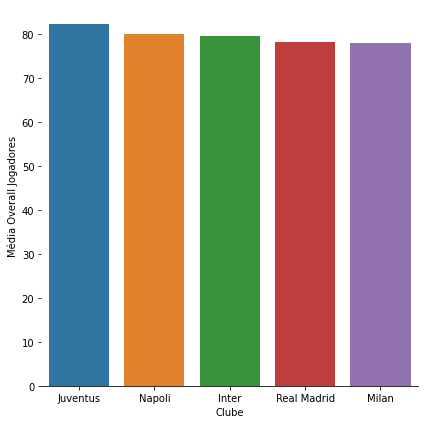

In [271]:
#GRÁFICO INDICANDO OS 5 MELHORES CLUBES BASEADO NA MÉDIA DO OVERALL DOS SEUS JOGADORES
dfTop5Times = dfBaseGeral[['Club', 'Overall']].groupby('Club').mean()
dfTop5Times = dfTop5Times.sort_values('Overall', ascending=False).head()
dfTop5Times = dfTop5Times.reset_index()

fig = sns.catplot(
    data=dfTop5Times, kind="bar",
    x='Club', y="Overall",
    ci="sd", height=6
)
fig.despine(left=True)
fig.set_axis_labels("Clube", "Média Overall Jogadores")

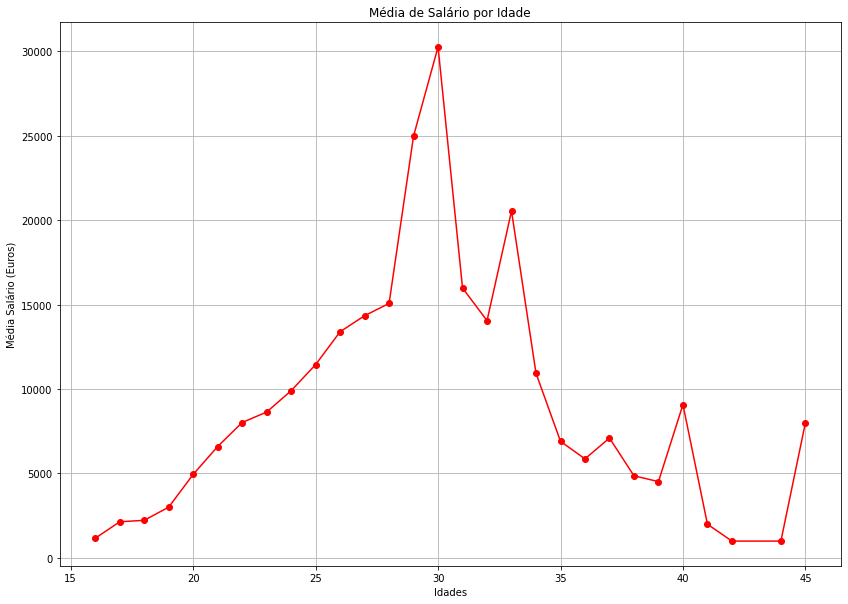

In [282]:
#GRÁFICO DA REALAÇÃO DE IDADE E SALÁRIO
dfIdadeSalario = dfBaseGeral[['Age', 'Wage']].groupby('Age').mean()
dfIdadeSalario = dfIdadeSalario.reset_index()
dfIdadeSalario = dfIdadeSalario.sort_values('Age', ascending=False)

fig, ax = plt.subplots()

x = dfIdadeSalario[['Age']]
y = dfIdadeSalario[['Wage']]

with plt.style.context('dark_background'):
    ax.plot(x, y, 'r-o')
    ax.set_xlabel('Idades')
    ax.set_ylabel('Média Salário (Euros)')
    ax.set_title('Média de Salário por Idade')

plt.rcParams["figure.figsize"] = (14,10)
plt.grid()
plt.show()

In [255]:
#CRIANDO COLUNA "INVESTIMENTO", QUE LEVA EM CONTA O INVESTIMENTO TOTAL NECESSÁRIO PARA ADQUIRIR O JOGADOR

dfBaseGeral["Total Investment"] = dfBaseGeral["Value"] + dfBaseGeral["Release Clause"]

In [256]:
#CRIANDO COLUNA COM O VALOR DO SALÁRIO ANUAL

dfBaseGeral["Salary per Year"] = dfBaseGeral["Wage"] * 12

In [257]:
dfBaseGeral

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Total Investment,Salary per Year
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,337000000.0,6780000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,204100000.0,4860000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,346600000.0,3480000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,210600000.0,3120000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,298400000.0,4260000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,Right,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0,203000.0,12000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,Right,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0,173000.0,12000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,Right,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0,225000.0,12000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,Right,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0,203000.0,12000.0
